<a href="https://colab.research.google.com/github/shreyassks/Learning-Content/blob/master/K_Means_Clustering_usecase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
df = pd.read_csv('cars.csv')

df.dtypes

mpg             float64
 cylinders        int64
 cubicinches     object
 hp               int64
 weightlbs       object
 time-to-60       int64
 year             int64
 brand           object
dtype: object

In [159]:
df.head(5)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [160]:
df.columns = ['mpg','cylinders','cubicinches','hp','weightlbs','time260','year','brand']
df.columns.values

array(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time260',
       'year', 'brand'], dtype=object)

In [161]:
df['brand'].value_counts()

 US.        162
 Japan.      51
 Europe.     48
Name: brand, dtype: int64

In [0]:
# Convert columns with Object data type into numeric 
# This will enable us to find out if there are any missing values
df = df.iloc[:,:-1].values # dropping the last column and converting dataframe into a numpy array
input_data = pd.DataFrame(df)

In [163]:
input_data.columns = ['mpg','cylinders','cubicinches','hp','weightlbs','time260','year']
print(len(input_data.columns))
input_data.head(5)
type(input_data)

7


pandas.core.frame.DataFrame

In [164]:
input_data.dtypes

mpg            object
cylinders      object
cubicinches    object
hp             object
weightlbs      object
time260        object
year           object
dtype: object

In [165]:
input_data = input_data.convert_objects(convert_numeric = True) # converts object type to numeric
# to find missing values, dtype of a variable should be numeric

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [166]:
input_data.dtypes

mpg            float64
cylinders        int64
cubicinches    float64
hp               int64
weightlbs      float64
time260          int64
year             int64
dtype: object

In [167]:
input_data.apply(lambda x: sum(x.isna())) # missing values in the input data

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time260        0
year           0
dtype: int64

In [168]:
input_data['cubicinches'] = input_data['cubicinches'].fillna(input_data['cubicinches'].mean())
input_data['weightlbs'] = input_data['weightlbs'].fillna(input_data['weightlbs'].mean())
input_data.isna().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time260        0
year           0
dtype: int64

In [169]:
input_data.dtypes

mpg            float64
cylinders        int64
cubicinches    float64
hp               int64
weightlbs      float64
time260          int64
year             int64
dtype: object

In [0]:
from sklearn import preprocessing
# Get column names first
names = input_data.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(input_data)
scaled_df = pd.DataFrame(scaled_df, columns=names)

Text(0.5, 1.0, 'Elbow Curve')

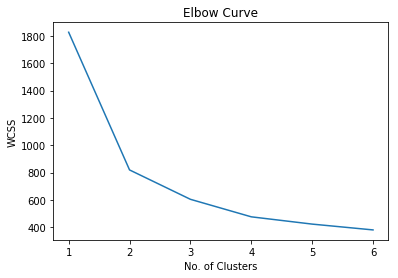

In [171]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,7):
  km = KMeans(n_clusters = i, max_iter = 100).fit(scaled_df)
  wcss.append(km.inertia_)
  
plt.plot(np.arange(1,7), wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Curve")

In [0]:
km = KMeans(n_clusters = 3, max_iter = 100).fit(scaled_df)
y_kmeans = km.fit_predict(scaled_df)

In [173]:
y_kmeans

array([0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0, 2,
       1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 2, 0,
       2, 2, 0, 1, 1, 2, 2, 2, 1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1,
       0, 0, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 2,
       1, 2, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       0, 0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 1, 0, 2, 0,
       2, 2, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2],
      dtype=int32)

In [174]:
input_data = scaled_df.as_matrix(columns=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [175]:
print((y_kmeans == 0).sum())
print((y_kmeans == 1).sum())
print((y_kmeans == 2).sum())

75
91
95


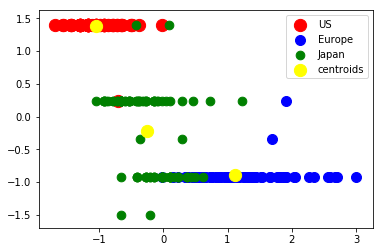

In [176]:
plt.scatter(input_data[y_kmeans==0,0], input_data[y_kmeans == 0,1], s = 150, color = 'red', label = 'US')
plt.scatter(input_data[y_kmeans==1,0], input_data[y_kmeans == 1,1], s = 100, color = 'blue', label = 'Europe')
plt.scatter(input_data[y_kmeans==2,0], input_data[y_kmeans == 2,1], s = 75, color = 'green', label = 'Japan')
#plt.scatter(input_data[y_kmeans==3,0], input_data[y_kmeans == 3,1], color = 'black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 150, color = 'Yellow', label = 'centroids')
plt.legend()

In [177]:
input_data[y_kmeans == 0,0]  # y_kmeans == 0 will filter the rows giving prediction as "0" cluster. 0,0 will give 0th column of X corresponding to prediction "0" cluster
input_data[y_kmeans == 0,1] # y_kmeans == 0 will filter the rows giving prediction as "0" cluster. 0,1 will give 1st column of X corresponding to prediction "0" cluster

array([1.39305285, 1.39305285, 1.39305285, 1.39305285, 1.39305285,
       1.39305285, 1.39305285, 1.39305285, 1.39305285, 1.39305285,
       1.39305285, 1.39305285, 1.39305285, 1.39305285, 1.39305285,
       1.39305285, 1.39305285, 1.39305285, 1.39305285, 1.39305285,
       1.39305285, 1.39305285, 1.39305285, 1.39305285, 1.39305285,
       1.39305285, 1.39305285, 1.39305285, 1.39305285, 1.39305285,
       1.39305285, 1.39305285, 1.39305285, 1.39305285, 1.39305285,
       1.39305285, 1.39305285, 1.39305285, 1.39305285, 1.39305285,
       1.39305285, 1.39305285, 1.39305285, 1.39305285, 1.39305285,
       1.39305285, 1.39305285, 1.39305285, 1.39305285, 1.39305285,
       1.39305285, 1.39305285, 1.39305285, 1.39305285, 1.39305285,
       1.39305285, 1.39305285, 1.39305285, 1.39305285, 0.23697401,
       1.39305285, 1.39305285, 1.39305285, 1.39305285, 1.39305285,
       1.39305285, 1.39305285, 1.39305285, 1.39305285, 1.39305285,
       1.39305285, 1.39305285, 1.39305285, 1.39305285, 1.39305

In [178]:
km.cluster_centers_[:,0]

array([-1.0415261 ,  1.11461203, -0.24542355])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # This is added back by InteractiveShellApp.init_path()


0
0
0
0
0
0
0


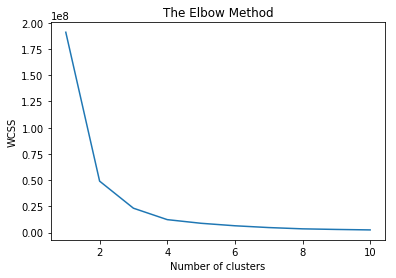

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


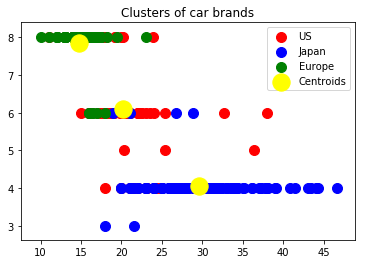

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('cars.csv')

X = dataset.iloc[:,:-1].values

X = pd.DataFrame(X)
X = X.convert_objects(convert_numeric=True)
X.columns = ['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60', 'year']

# Eliminating null values
for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))
for i in X.columns:
    print(X[i].isnull().sum())
    

# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

X = X.as_matrix(columns=None)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='US')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='Japan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()

In [180]:
print((y_kmeans == 0).sum())
print((y_kmeans == 1).sum())
print((y_kmeans == 2).sum())

81
118
62


In [181]:
kmeans.cluster_centers_[:,0]

array([20.20123457, 29.54661017, 14.80645161])